In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn import tree
df = pd.read_csv("/kaggle/input/heart-disease/HeartDiseaseTrain-Test.csv")



In [3]:
categorical_cols = [
    col for col in [
        "sex",
        "chest_pain_type",
        "fasting_blood_sugar",
        "rest_ecg",
        "exercise_induced_angina",
        "slope",
        "thalassemia"
    ]
    if col in df.columns
]


In [4]:
df = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)


In [5]:
df.dtypes


age                                           int64
resting_blood_pressure                        int64
cholestoral                                   int64
Max_heart_rate                                int64
oldpeak                                     float64
vessels_colored_by_flourosopy                object
target                                        int64
sex_Male                                       bool
chest_pain_type_Atypical angina                bool
chest_pain_type_Non-anginal pain               bool
chest_pain_type_Typical angina                 bool
fasting_blood_sugar_Lower than 120 mg/ml       bool
rest_ecg_Normal                                bool
rest_ecg_ST-T wave abnormality                 bool
exercise_induced_angina_Yes                    bool
slope_Flat                                     bool
slope_Upsloping                                bool
thalassemia_No                                 bool
thalassemia_Normal                             bool
thalassemia_

In [6]:
df = pd.get_dummies(
    df,
    columns=["vessels_colored_by_flourosopy"],
    drop_first=True
)


In [7]:
X = df.drop("target", axis=1)
y = df["target"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [9]:
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [10]:
y_pred = dt.predict(X_test)


In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7658536585365854

Confusion Matrix:
 [[74 28]
 [20 83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       102
           1       0.75      0.81      0.78       103

    accuracy                           0.77       205
   macro avg       0.77      0.77      0.77       205
weighted avg       0.77      0.77      0.77       205



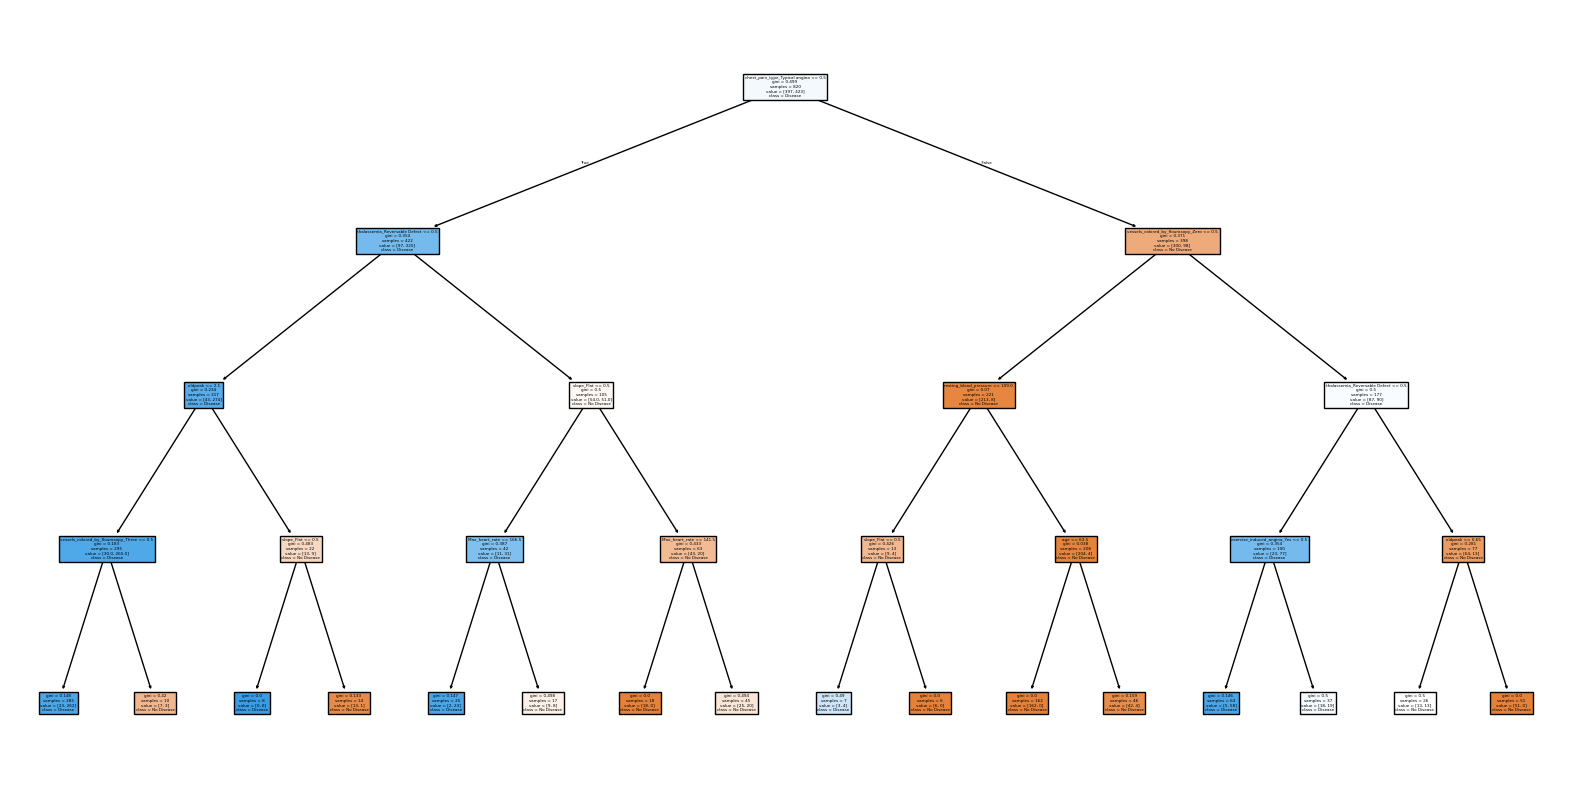

In [14]:
plt.figure(figsize=(20,10))
tree.plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True
)
plt.show()


In [15]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance


,Feature,Importance
8,chest_pain_type_Typical angina,0.408219
17,thalassemia_Reversable Defect,0.196266
21,vessels_colored_by_flourosopy_Zero,0.159173
13,slope_Flat,0.071908
4,oldpeak,0.066838
3,Max_heart_rate,0.033280
12,exercise_induced_angina_Yes,0.028053
19,vessels_colored_by_flourosopy_Three,0.026904
1,resting_blood_pressure,0.007392
0,age,0.001967
